<a href="https://colab.research.google.com/github/ALK26/Projects/blob/master/Web_Scraping_Basketball_Stats_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import bs4
import requests
import pandas as pd
import numpy as np
import boto3

In [2]:
def get_basketball_stats(link='https://en.wikipedia.org/wiki/Michael_Jordan'):
    # read the webpage 
    response = requests.get(link)
    # create a BeautifulSoup object to parse the HTML  
    soup = bs4.BeautifulSoup(response.text, 'html.parser')
    # the player stats are defined  with the attribute CSS class set to 'wikitable sortable'; 
    #therefore we create a tag object "table"
    table=soup.find(class_='wikitable sortable')

    #the headers of the table are the first table row (tr) we create a tag object that has the first row  
    headers=table.tr
    #the table column names are displayed  as an abbreviation; therefore we find all the abbr tags and returs an Iterator
    titles=headers.find_all("abbr")
    #we create a dictionary  and pass the table headers as the keys 
    data = {title['title']:[] for title in titles}
   #we will store each column as a list in a dictionary, the header of the column will be the dictionary key 

    #we iterate over each table row by fining each table tag tr and assign it to the objed
    for row in table.find_all('tr')[1:]:
    
        #we iterate over each cell in the table, as each cell corresponds to a different column we all obtain the correspondin key corresponding the column n 
        for key,a in zip(data.keys(),row.find_all("td")[2:]):
            # we append each elment and strip any extra HTML contnet 
            data[key].append(''.join(c for c in a.text if (c.isdigit() or c == ".")))

    # we remove extra rows by finding the smallest list     
    Min=min([len(x)  for x in data.values()])
    #we convert the elements in the key to floats 
    for key in data.keys():
    
        data[key]=list(map(lambda x: float(x), data[key][:Min]))
       
    return data

In [3]:
# Web Scraping the data and Converting to Pandas Dataframe 
# use the function get_basketball_stats to extract a Python Dictionary of the player statistics, 
# convert the dictionary to a Python Dataframe. 
# display the first five rows of the dataframe 
# the name of each player printed above. 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display


In [5]:
# The list links contain the link the Wikipedia article for each player. 
# The list names contains the names of each player.

In [6]:
links=['https://en.wikipedia.org/wiki/Michael_Jordan'\
       ,'https://en.wikipedia.org/wiki/Kobe_Bryant'\
      ,'https://en.wikipedia.org/wiki/LeBron_James'\
      
      ,'https://en.wikipedia.org/wiki/Stephen_Curry']
names=['Michael Jordan','Kobe Bryant','Lebron James','Stephen Curry']

In [8]:
# can use the function get_basketball_stats to extract the Regular season table and store it to a Python dictionary. 
# can extract the table for Michael Jordan and convert it to a Python dictionary as follows:

# using the link
michael_jordan_dict=get_basketball_stats('https://en.wikipedia.org/wiki/Michael_Jordan')

michael_jordan=pd.DataFrame(michael_jordan_dict)
print(names[0])
michael_jordan.head()

Michael Jordan


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,82.0,82.0,38.3,0.515,0.173,0.845,6.5,5.9,2.4,0.8,28.2
1,18.0,7.0,25.1,0.457,0.167,0.840,3.6,2.9,2.1,1.2,22.7
2,82.0,82.0,40.0,0.482,0.182,0.857,5.2,4.6,2.9,1.5,37.1
3,82.0,82.0,40.4,0.535,0.132,0.841,5.5,5.9,3.2,1.6,35.0
4,81.0,81.0,40.2,0.538,0.276,0.850,8.0,8.0,2.9,0.8,32.5


In [9]:
# For each Player create a Python dictionary from the table Regular season table
# For each Player convert the Python Dictionary to a Pandas Dataframe using the constructor pd.DataFrame()
# For each player display the first five rows of the Dataframe, print the name of each Player above the Dataframe.

In [10]:
lebron_james_dict=get_basketball_stats('https://en.wikipedia.org/wiki/LeBron_James')

lebron_james=pd.DataFrame(lebron_james_dict)
print("LEBRON JAMES")
lebron_james.head()

LEBRON JAMES


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,79.0,79.0,39.5,0.417,0.290,0.754,5.5,5.9,1.6,0.7,20.9
1,80.0,80.0,42.4,0.472,0.351,0.750,7.4,7.2,2.2,0.7,27.2
2,79.0,79.0,42.5,0.480,0.335,0.738,7.0,6.6,1.6,0.8,31.4
3,78.0,78.0,40.9,0.476,0.319,0.698,6.7,6.0,1.6,0.7,27.3
4,75.0,74.0,40.4,0.484,0.315,0.712,7.9,7.2,1.8,1.1,30.0


In [11]:
kobe_bryant_dict=get_basketball_stats('https://en.wikipedia.org/wiki/Kobe_Bryant')

kobe_bryant=pd.DataFrame(kobe_bryant_dict)
print("KOBE BRYANT")
kobe_bryant.head()

KOBE BRYANT


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,71.0,6.0,15.5,0.417,0.375,0.819,1.9,1.3,0.7,0.3,7.6
1,79.0,1.0,26.0,0.428,0.341,0.794,3.1,2.5,0.9,0.5,15.4
2,50.0,50.0,37.9,0.465,0.267,0.839,5.3,3.8,1.4,1.0,19.9
3,66.0,62.0,38.2,0.468,0.319,0.821,6.3,4.9,1.6,0.9,22.5
4,68.0,68.0,40.9,0.464,0.305,0.853,5.9,5.0,1.7,0.6,28.5


In [12]:
stephen_curry_dict=get_basketball_stats('https://en.wikipedia.org/wiki/Stephen_Curry')

stephen_curry=pd.DataFrame(stephen_curry_dict)
print("STEPHEN CURRY")
stephen_curry.head()

STEPHEN CURRY


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,80.0,77.0,36.2,0.462,0.437,0.885,4.5,5.9,1.9,0.2,17.5
1,74.0,74.0,33.6,0.480,0.442,0.934,3.9,5.8,1.5,0.3,18.6
2,26.0,23.0,28.2,0.490,0.455,0.809,3.4,5.3,1.5,0.3,14.7
3,78.0,78.0,38.2,0.451,0.453,0.900,4.0,6.9,1.6,0.2,22.9
4,78.0,78.0,36.5,0.471,0.424,0.885,4.3,8.5,1.6,0.2,24.0


In [ ]:
# plot the Points per game for a player using the function plt.plot()
# Import the plotting library

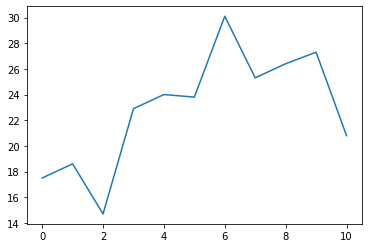

In [13]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
import numpy as np

plt.plot(stephen_curry["Points per game"])
plt.show()


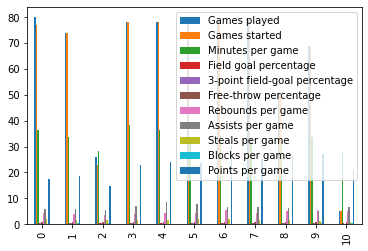

In [14]:
stephen_curry.plot(kind="bar")
plt.show()

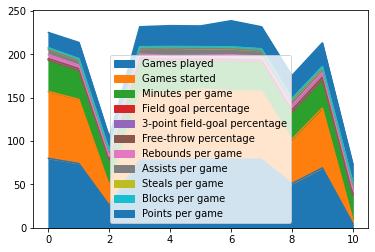

In [15]:
stephen_curry.plot(kind="area")

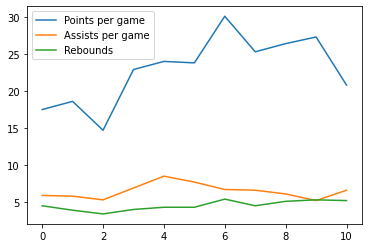

In [16]:
fig,ax=plt.subplots()
points_per_game = stephen_curry["Points per game"]
points_per_game.plot(x="years", y="Points per game", ax=ax)
assists_per_game= stephen_curry["Assists per game"]
assists_per_game.plot(x="years", y="Assists per game", ax=ax)
rebounds= stephen_curry["Rebounds per game"]
rebounds.plot(x="years", y="Rebounds per game", ax=ax)

ax.legend(["Points per game", "Assists per game", "Rebounds"])
plt.show()